#### **Handling Imbalaced DataSet**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Shashank Python V/Projects/DataSet/Credit_Card/creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()    # 0 indicates No Frauds and 1 -> Fraud

0    284315
1       492
Name: Class, dtype: int64

In [8]:
f"No Fraud %age: {round(df.Class.value_counts()[0] / df.shape[0]  * 100, 2)}"

'No Fraud %age: 99.83'

In [9]:
f"Fraud %age: {round(df.Class.value_counts()[1] / df.shape[0]  * 100, 2)}"

'Fraud %age: 0.17'

**Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, we might get a lot of errors and our algorithms will probably overfit as it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to identify patterns that give signs of fraud**

**Let's Visualise**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


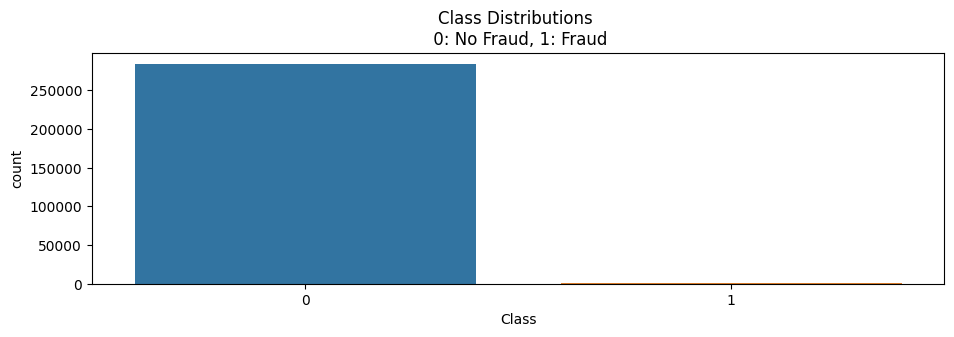

In [11]:
plt.style.use('default')
plt.figure(figsize=(11, 3))
sns.countplot(x= 'Class', data = df)
plt.title('Class Distributions \n 0: No Fraud, 1: Fraud')
plt.show()

**By seeing the distributions we can have an idea how Skewed are these features**

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Scaling and Distributing**
* We will first scale Time and Amount columns.

* And next, we need to **create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases**, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

**In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.**

**Why do we create a sub-Sample?**
* **Overfitting**: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

* **Wrong Correlations**: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.


In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
scaler = RobustScaler()
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [15]:
df.Amount.values.reshape(-1, 1)     

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [16]:
scaler.fit_transform(df.Amount.values.reshape(-1, 1))      # Need to Reshape as Rob Scaler expects Two Dimensional Array as Argument 

array([[ 1.78327395],
       [-0.26982463],
       [ 4.98372109],
       ...,
       [ 0.64109551],
       [-0.16767973],
       [ 2.72479564]])

In [17]:
df.insert(0, 'Scaled_Time', scaler.fit_transform(df.Time.values.reshape(-1, 1)))

In [18]:
df.insert(1, 'Scaled_Amount', scaler.fit_transform(df.Time.values.reshape(-1, 1)))

In [19]:
df.drop(['Time', 'Amount'], axis = 1, inplace=True)

In [20]:
df.head()

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


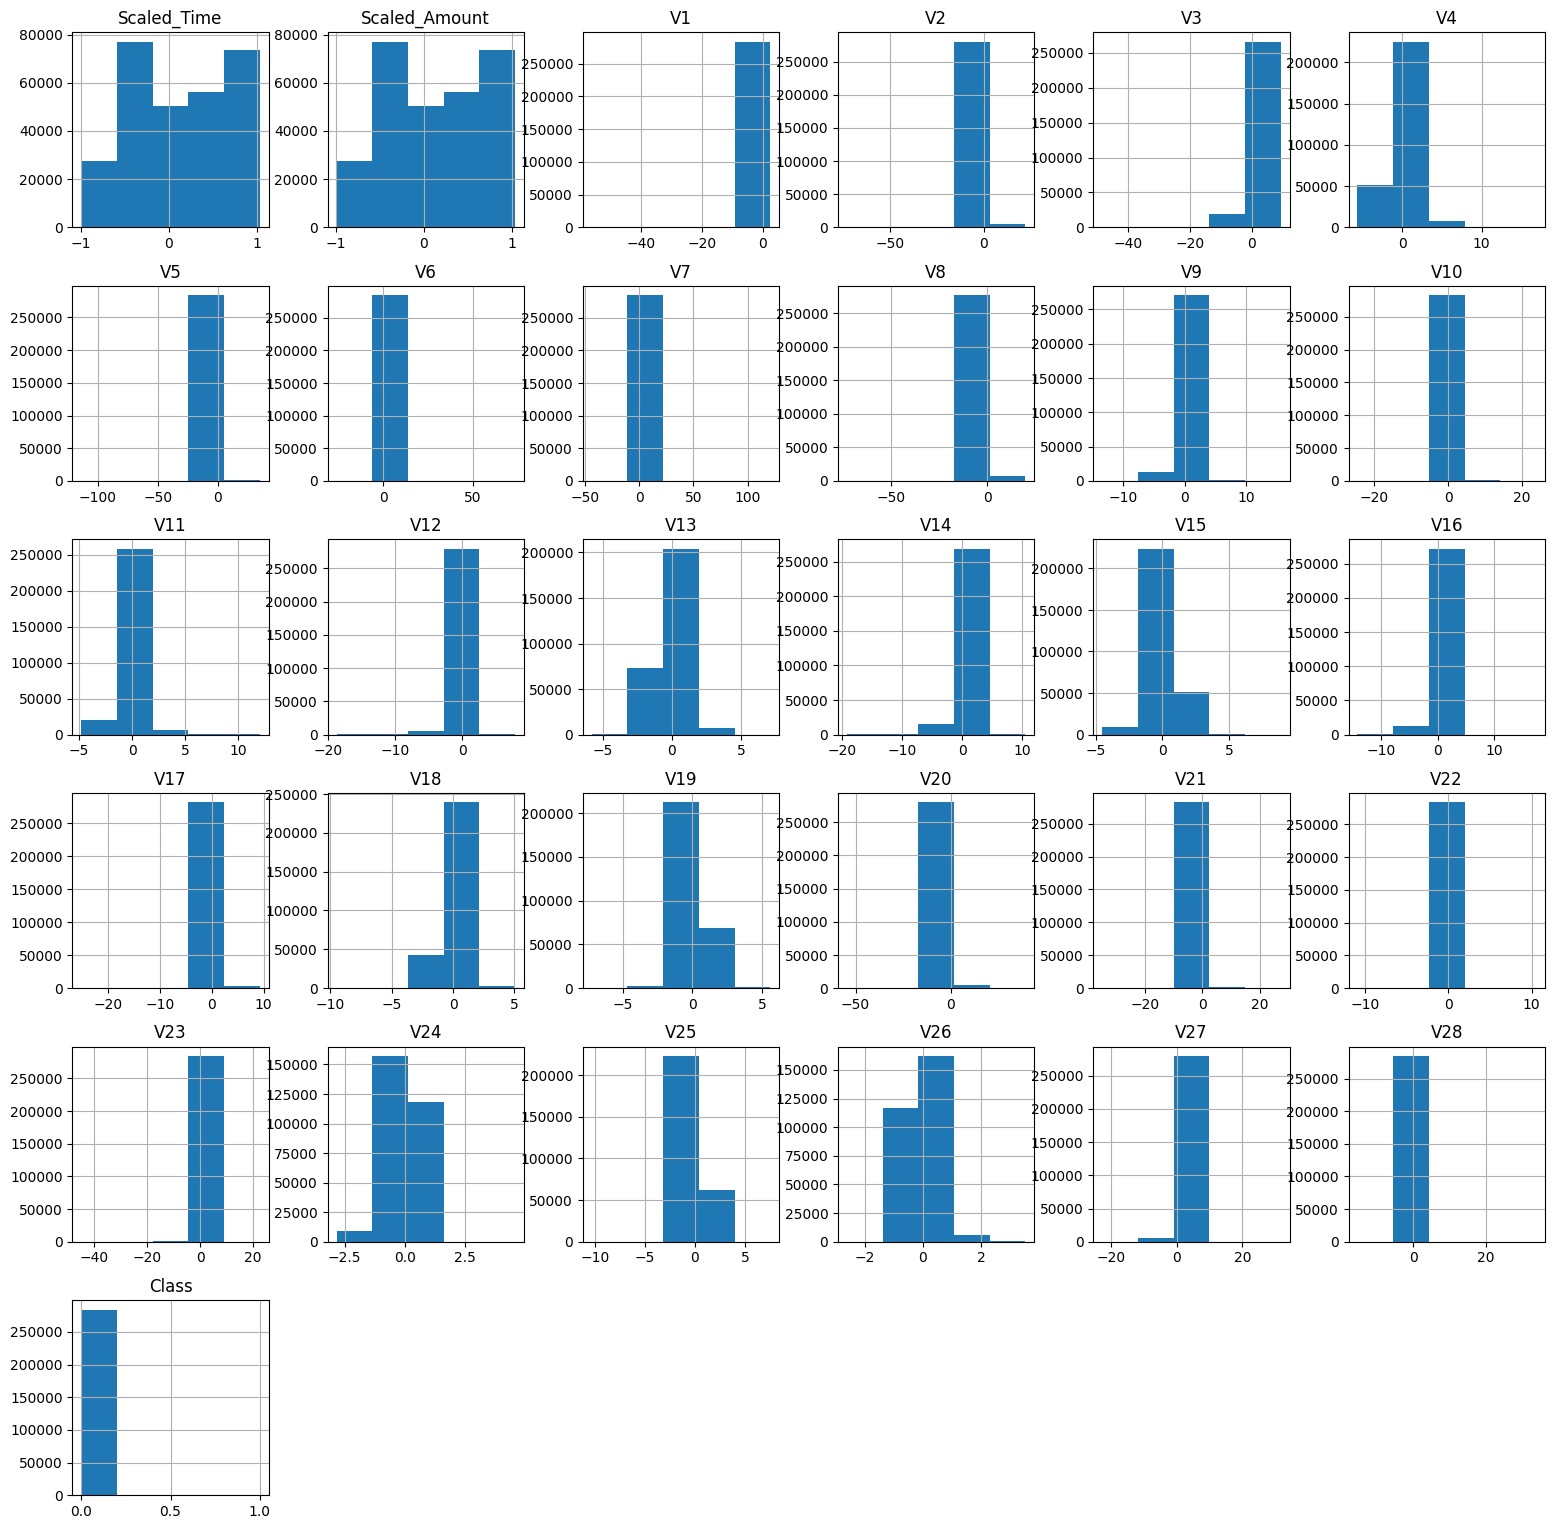

In [21]:
df.hist(bins = 5, figsize=(19, 19))
plt.show()

**Splitting Data**


References: 
https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36


The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and **test it on the original testing set.**

You should always do your evaluation of model performance on data that has not been over/undersampled. You can setup a pipeline to perform your undersampling on the training set and then evaluate on the non-undersampled fold of data for each iteration as you described.

In [22]:
X, y = df.drop('Class', axis=1), df.Class

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In Stratified ShuffleSplit, cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds
are made by preserving the percentage of samples for each class.

In [24]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)  

In [25]:
sss.get_n_splits(X, y)

5

In [26]:
for train_index, test_index in sss.split(X, y):
  print(f'Train_Index: {train_index}, Test_Index: {test_index}')  

Train_Index: [169217 127577 155900 ...  13766  17677 208796], Test_Index: [121884 150951   8235 ...  83538 235156  16008]
Train_Index: [ 80426 254444  49959 ...   2625  49834  81296], Test_Index: [ 58702 142964 201629 ...  44890 229367  83658]
Train_Index: [ 51865 233382 240364 ... 192159 274894 249732], Test_Index: [  8129 270050 249591 ... 183398 186162   3129]
Train_Index: [ 48451 141948 160995 ...  94695  34074 272673], Test_Index: [144546 256990  39470 ... 108334 149189 189289]
Train_Index: [222092 275796 227847 ... 213527 164028 229351], Test_Index: [129329 234175  81986 ...   5584 113376   9365]


In [27]:
print(f'Train_Index_Length: {train_index.shape}, Test_Index_Length: {test_index.shape}')

Train_Index_Length: (256326,), Test_Index_Length: (28481,)


In [28]:
# After 1 fold
X.iloc[[(train_index, test_index) for train_index, test_index in sss.split(X, y)][0][0]] # Train
X.iloc[[(train_index, test_index) for train_index, test_index in sss.split(X, y)][0][1]] # Test

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
121884,-0.097945,-0.097945,1.177195,0.354835,-0.050112,0.996283,0.114707,-0.533672,0.323340,-0.039656,-0.440988,0.192541,1.610483,0.652893,-0.903942,0.952140,0.301903,-0.336806,-0.167604,-0.297136,-0.393193,-0.232363,0.086546,0.269000,-0.093402,0.224293,0.697098,-0.294187,0.000146,-0.002305
150951,0.111855,0.111855,1.929328,-0.230009,-0.722492,1.379370,0.327867,0.869605,-0.459958,0.156941,2.348205,-0.219169,0.097356,-1.709852,1.224763,1.365096,-2.463741,0.103727,0.011052,0.293584,0.738815,-0.256200,-0.695468,-1.555905,0.254467,-1.599841,-0.225790,-1.074505,0.018082,-0.057300
8235,-0.865071,-0.865071,1.245603,-0.063529,0.856232,0.336334,-0.916074,-0.863592,-0.496453,-0.153100,1.872207,-0.493736,0.490502,-2.842432,0.893779,1.653561,0.677589,0.528428,0.346374,0.264330,-0.397987,-0.138715,-0.076642,-0.003412,-0.004729,0.377923,0.176246,1.034232,-0.095239,0.003889
211010,0.628849,0.628849,-0.939001,1.082314,-0.267542,-1.106319,1.011555,-1.012780,1.054262,-0.143406,0.018528,-0.512210,-1.541309,0.196441,0.462485,0.222478,-0.334665,-0.321991,-0.525759,-0.403170,0.374998,-0.093108,-0.129332,-0.169412,-0.395748,-0.618097,-0.057835,-0.134543,-0.143480,-0.164164
246098,0.802888,0.802888,-1.340880,0.364304,1.265265,-0.479915,-0.849015,0.489150,0.766527,0.619257,-0.378495,-1.226591,0.279870,0.171774,-0.736429,0.663261,0.448371,0.557524,-0.610001,0.893902,0.644026,0.334137,0.060539,-0.415840,0.275328,-0.553855,0.380016,-0.401064,-0.136261,0.012904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97370,-0.217390,-0.217390,1.298034,0.583626,-0.603144,1.125589,0.353917,-0.746550,0.221369,-0.143223,0.107525,-0.538907,-0.855973,-0.792004,-0.752017,-0.929901,1.214578,0.788750,0.418465,0.845216,-0.261368,-0.134580,-0.116960,-0.303056,-0.213098,-0.600585,0.773576,-0.272034,0.025217,0.040758
176490,0.447609,0.447609,-0.576468,1.726515,0.403589,4.280915,1.282501,0.121994,1.725724,-0.243746,-3.163243,1.691385,0.622676,-0.834971,-1.214453,1.274681,-0.321265,-0.883863,0.425107,0.315179,1.625224,0.149299,0.365068,0.997768,-0.643971,0.064092,1.025478,0.907515,-0.125869,0.058118
83538,-0.291204,-0.291204,1.054477,0.088501,1.459097,1.342977,-0.927214,-0.217887,-0.497524,0.069591,0.266935,-0.089968,0.451970,1.112653,1.319336,-0.239939,1.483211,0.180157,-0.310193,-0.415031,-1.288709,-0.044394,0.208879,0.691996,0.048674,0.631521,0.233502,-0.355898,0.085483,0.049124
235156,0.746978,0.746978,0.191516,-0.320404,0.012047,-1.707050,0.301898,0.141932,0.203985,0.017883,-0.261222,-0.096325,-2.317588,-0.846616,-0.378414,-0.767763,-2.373289,0.287630,0.520526,-1.689219,1.484589,0.054556,-0.032090,0.057703,0.135623,0.038466,-0.988335,-0.511627,0.250373,0.258195


**After 5 folds**

In [29]:
for train_index, test_index in sss.split(X, y):
  X_train_org, y_train_org = X.iloc[train_index], y.iloc[train_index]
  X_test_org, y_test_org  = X.iloc[test_index], y.iloc[test_index]

In [30]:
y_train_org.value_counts() / y_train_org.shape[0]  * 100   

0    99.827173
1     0.172827
Name: Class, dtype: float64

In [31]:
y_test_org.value_counts() / y_test_org.shape[0]  * 100

0    99.827955
1     0.172045
Name: Class, dtype: float64

#### Random Under-Sampling:
**which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.**

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [32]:
df = df.sample(frac=1)           # Shuffling

In [33]:
df_fraud = df[df.Class == 1]

In [34]:
df_fraud.shape

(492, 31)

In [35]:
df_non_fraud = df[df.Class == 0]

In [36]:
df_non_fraud.shape  

(284315, 31)

In [37]:
df_fraud.shape[0] / df_non_fraud.shape[0]                # df_non_fraud   

0.0017304750013189597

In [38]:
df_non_fraud = df_non_fraud.sample(frac = df_fraud.shape[0] / df_non_fraud.shape[0]) 

In [39]:
df_non_fraud.shape

(492, 31)

In [40]:
df_sample = pd.concat([df_fraud, df_non_fraud])

In [41]:
df_sample.shape

(984, 31)

In [42]:
df_sample.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

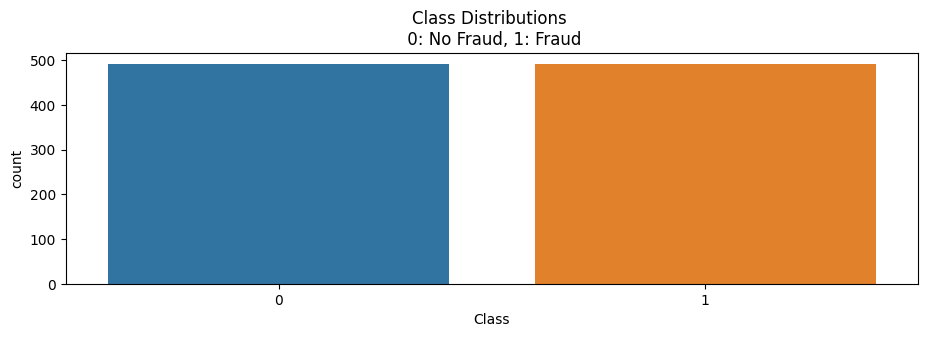

In [43]:
plt.figure(figsize=(11, 3))
sns.countplot(x = 'Class', data=df_sample)
plt.title('Class Distributions \n 0: No Fraud, 1: Fraud')
plt.show()

**Correlation Using HeatMap**


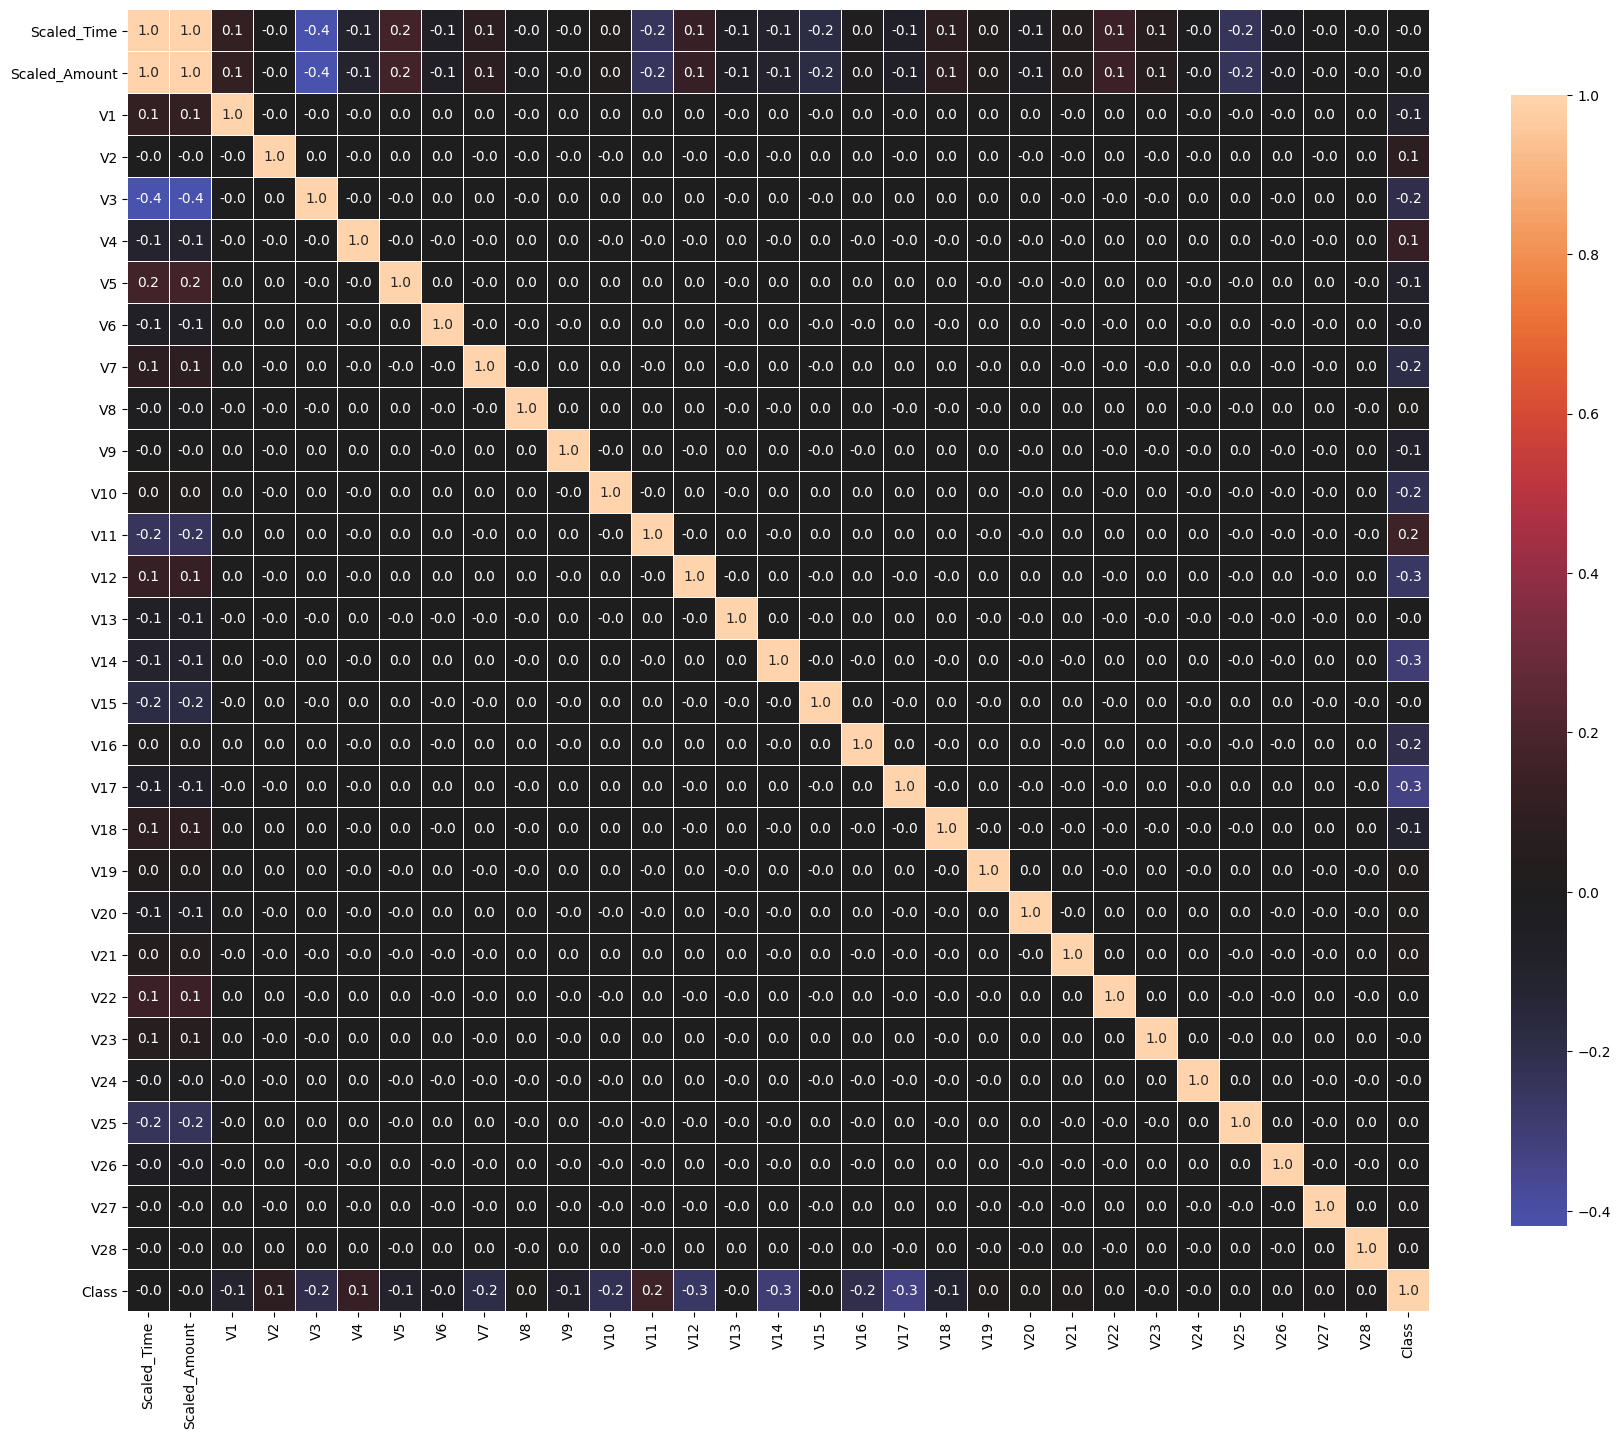

In [44]:
plt.figure(figsize=(21,21))
correlations = df.corr()
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.1f', square=True, linewidths=.3, annot=True, cbar_kws={"shrink": .70})
plt.show()

#### **Sample Dataframe**

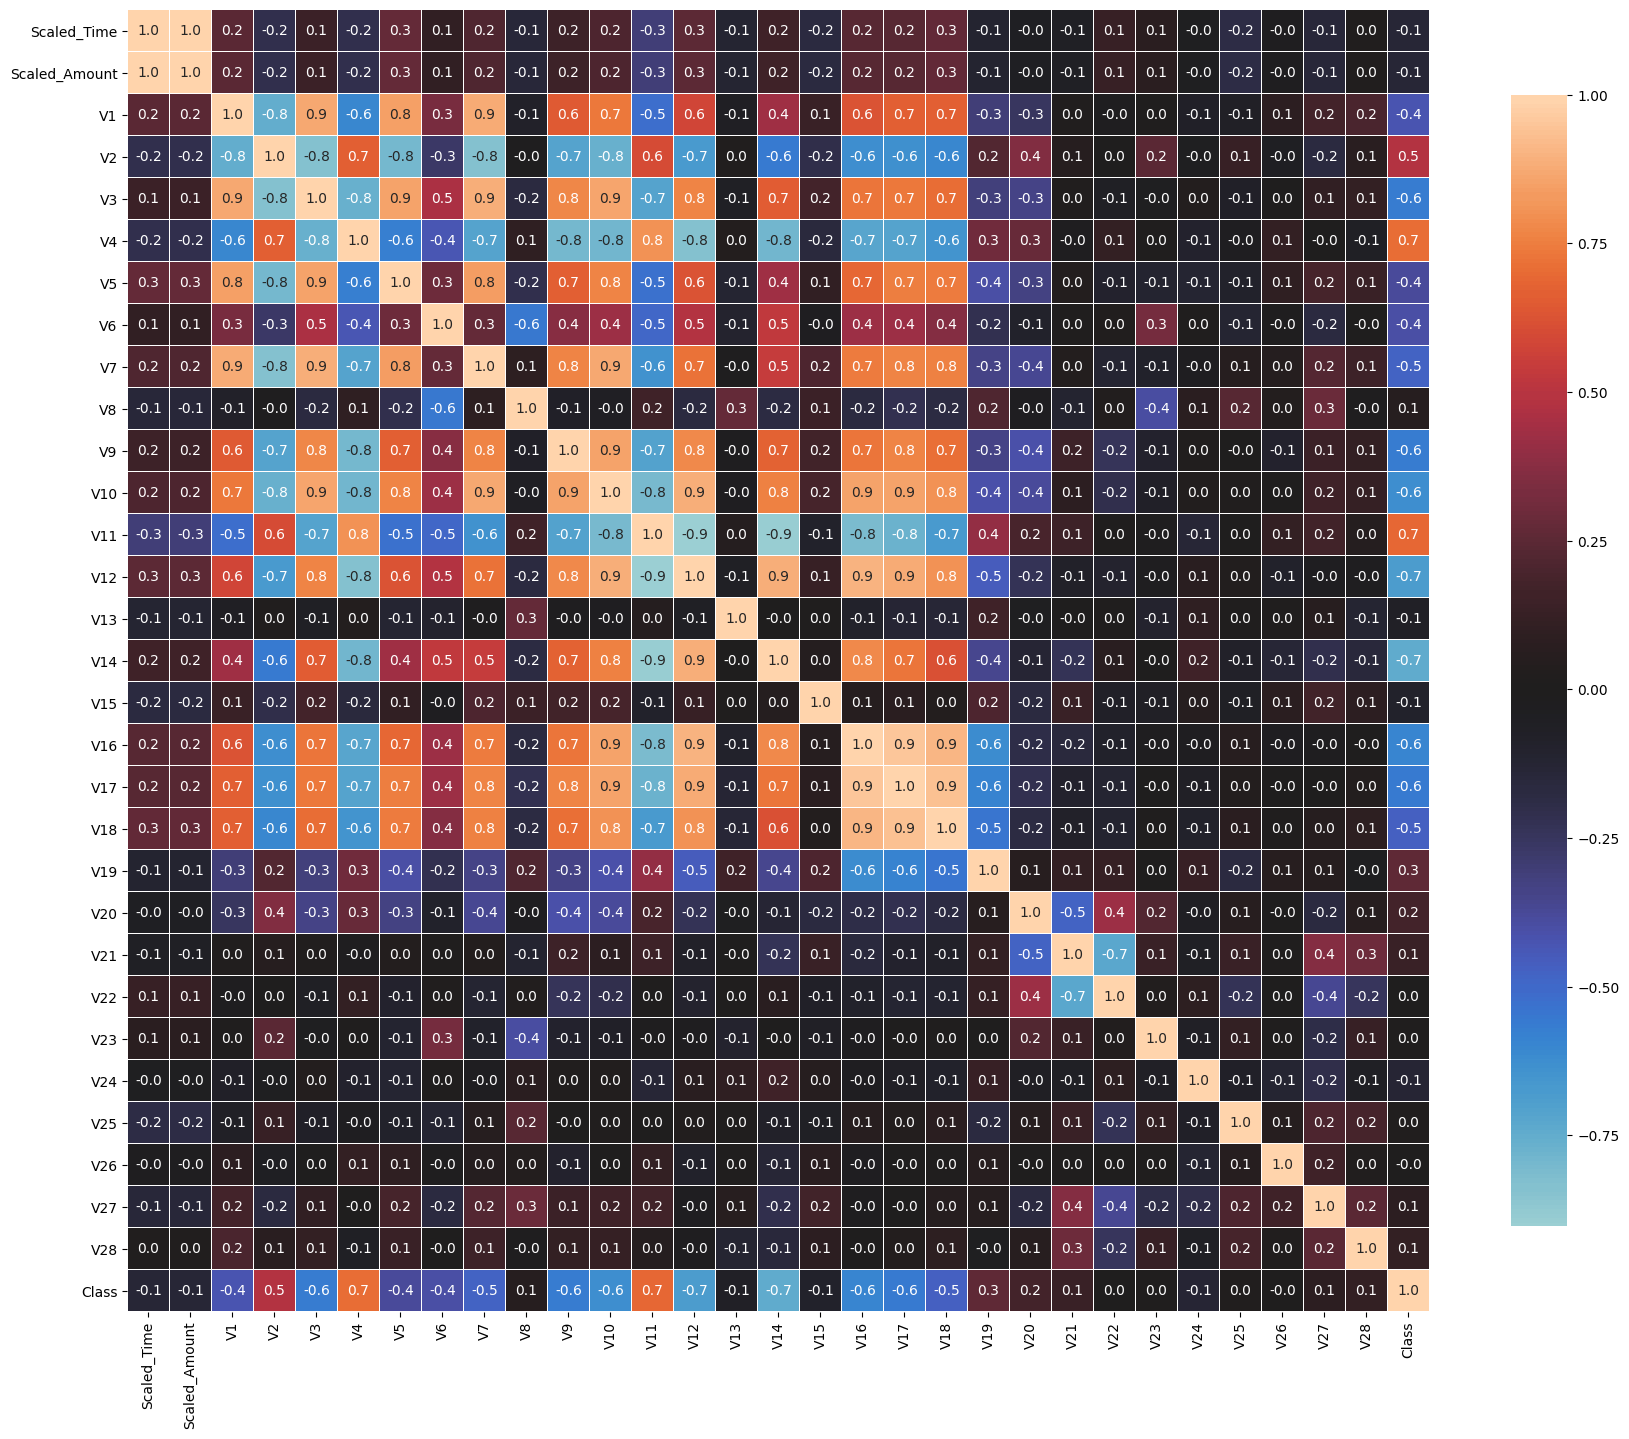

In [45]:
plt.figure(figsize=(21, 21))
correlations = df_sample.corr()
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.1f', square=True, linewidths=.3, annot=True, cbar_kws={"shrink": .70})
plt.show()

**Let's Examine How the Independent features are Correlated with Class i.e 'Target' feature.**


In [46]:
df_sample.corr().loc['Class'].sort_values(ascending = False)

Class            1.000000
V4               0.702704
V11              0.694606
V2               0.486170
V19              0.261143
V20              0.177614
V21              0.133768
V28              0.109029
V27              0.084580
V8               0.052577
V25              0.024842
V23              0.013392
V22              0.002689
V26             -0.000808
V13             -0.070432
V15             -0.092145
V24             -0.125252
Scaled_Amount   -0.132965
Scaled_Time     -0.132965
V5              -0.377821
V6              -0.400098
V1              -0.420841
V18             -0.464849
V7              -0.474725
V17             -0.559317
V9              -0.565619
V3              -0.567803
V16             -0.597600
V10             -0.626078
V12             -0.686580
V14             -0.747080
Name: Class, dtype: float64

**Top 5 Positively Correlated Features**

Positive Correlation: If the Features have higher correlation values with Class feature, it means the transactions are more likely to be fraud.

In [47]:
df_sample.corr().loc['Class'].sort_values(ascending = False)[1:6]

V4     0.702704
V11    0.694606
V2     0.486170
V19    0.261143
V20    0.177614
Name: Class, dtype: float64

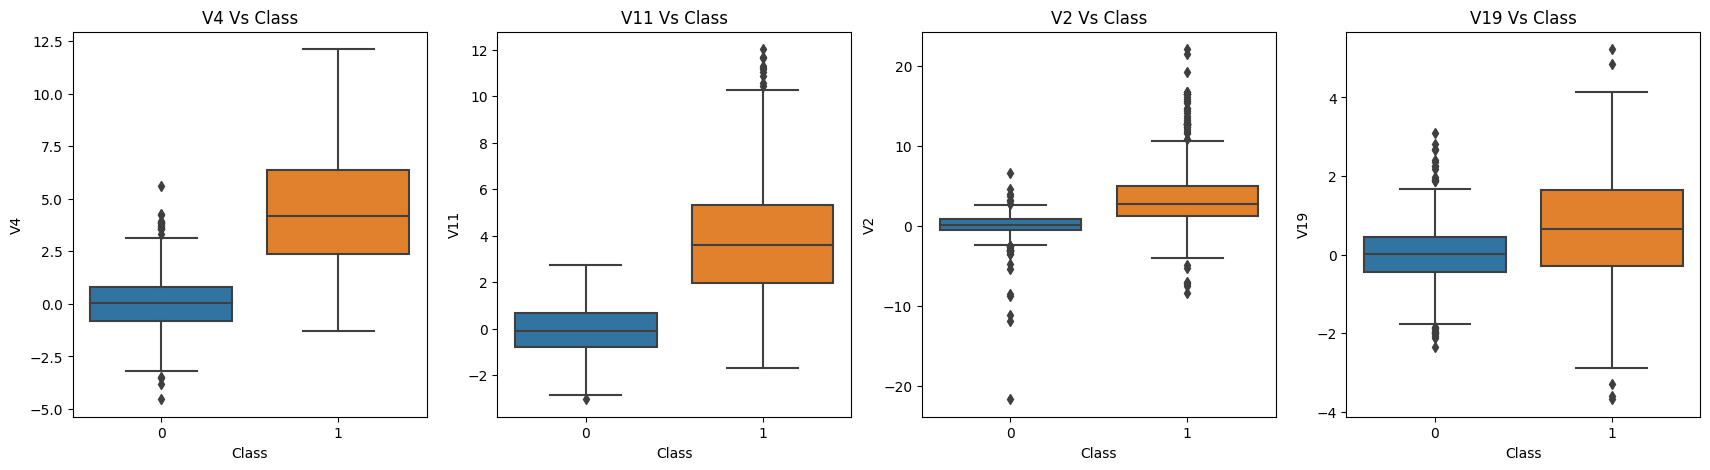

In [48]:
f, ax = plt.subplots(1, 4, figsize = (21, 5))
sns.boxplot(x = 'Class', y='V4', data=df_sample, ax = ax[0])
ax[0].set_title('V4 Vs Class')
sns.boxplot(x = 'Class', y='V11', data=df_sample, ax = ax[1])
ax[1].set_title('V11 Vs Class')
sns.boxplot(x = 'Class', y = 'V2', data=df_sample, ax = ax[2])
ax[2].set_title('V2 Vs Class')
sns.boxplot(x = 'Class', y = 'V19', data=df_sample, ax=ax[3])
ax[3].set_title('V19 Vs Class')
plt.show()


**Top 5 Negatively Correlated Features**

Negative Correlation: If the Feature have higher negative values like (-0.8, -0.75, -0.68), the transcation is more likely to be a fraud.          
Example y = -x, higher negative values of x increases y

In [49]:
df_sample.corr().loc['Class'].sort_values()[0:6]

V14   -0.747080
V12   -0.686580
V10   -0.626078
V16   -0.597600
V3    -0.567803
V9    -0.565619
Name: Class, dtype: float64

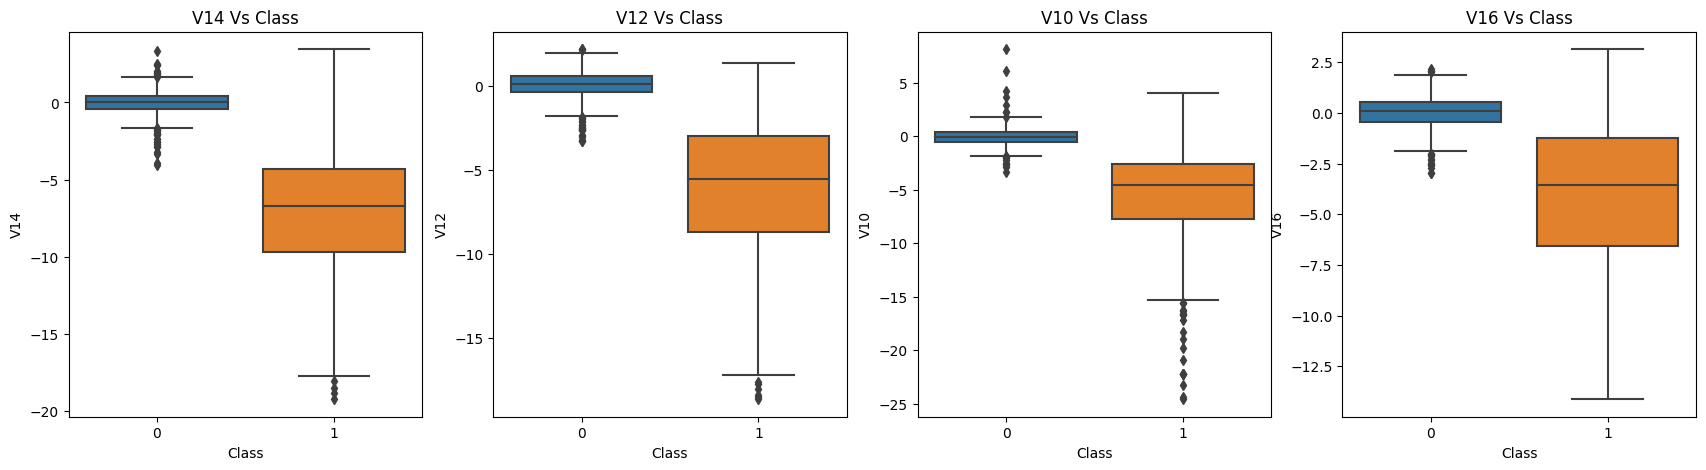

In [50]:
f, ax = plt.subplots(1, 4, figsize = (21, 5))
sns.boxplot(x = 'Class', y='V14', data=df_sample, ax = ax[0])
ax[0].set_title('V14 Vs Class')
sns.boxplot(x = 'Class', y='V12', data=df_sample, ax = ax[1])
ax[1].set_title('V12 Vs Class')
sns.boxplot(x = 'Class', y = 'V10', data=df_sample, ax = ax[2])
ax[2].set_title('V10 Vs Class')
sns.boxplot(x = 'Class', y = 'V16', data=df_sample, ax=ax[3])
ax[3].set_title('V16 Vs Class')

plt.show()


**Next Step is to Remove "extreme outliers" from features that have a high correlation with our classes.**

**Before that let's Visualize Distributions**

In [51]:
from scipy.stats import norm

In [52]:
# df_sample.V14.loc[df_sample.Class==1]
df_sample[df_sample.Class == 1].V14

44091     -8.036615
50211     -7.052311
214662    -7.914989
81186     -7.460103
152295    -3.547230
            ...    
43624     -5.160608
96341     -1.112735
42609    -13.044182
123141    -6.947010
178208    -5.853545
Name: V14, Length: 492, dtype: float64

In [53]:
import warnings
warnings.filterwarnings('ignore')

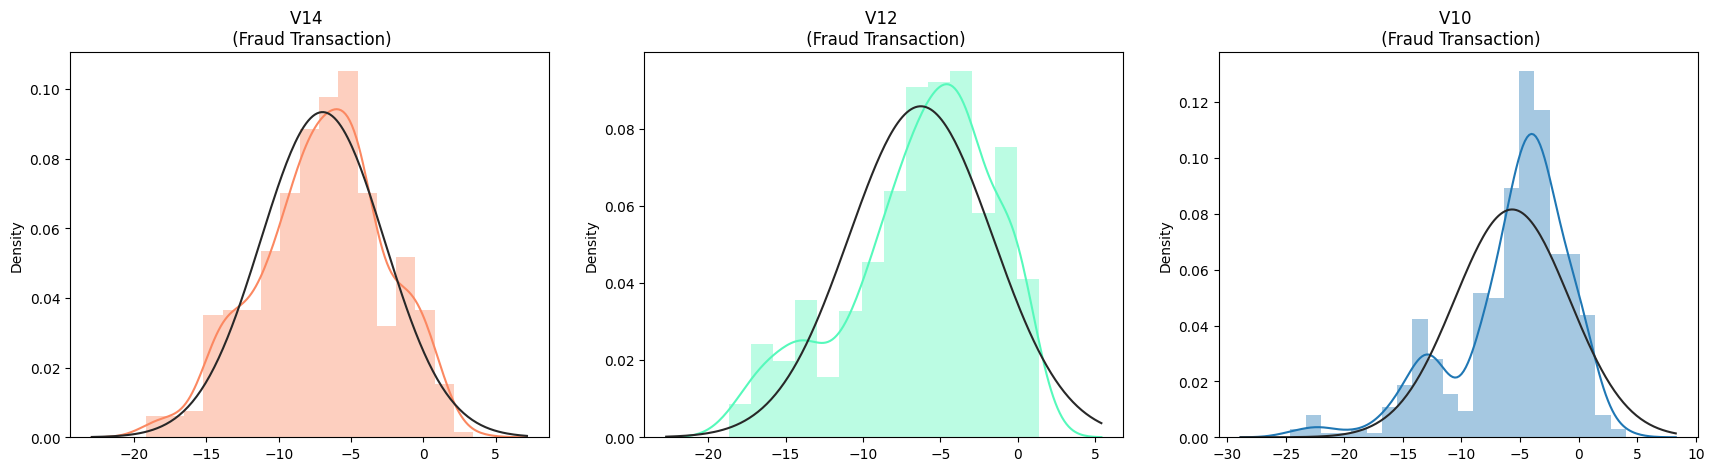

In [54]:
f, ax = plt.subplots(1, 3, figsize = (21, 5))
sns.distplot(df_sample[df_sample.Class == 1].V14.values, fit = norm, ax = ax[0], color='#FB8861')
ax[0].set_title('V14 \n (Fraud Transaction)')
sns.distplot(df_sample[df_sample.Class == 1].V12.values, fit = norm, ax = ax[1], color='#56F9BB')
ax[1].set_title('V12 \n (Fraud Transaction)')
sns.distplot(df_sample[df_sample.Class == 1].V10.values, fit = norm)
ax[2].set_title('V10 \n (Fraud Transaction)')
plt.show()

**From the plot above we can see that V14 feature nearly has a Gaussian Distribution** 

In [55]:
Q3, Q1 = df_sample[df_sample.Class == 1].V14.quantile(0.75), df_sample[df_sample.Class == 1].V14.quantile(0.25)

inter_quartile_range_V14 = Q3 - Q1
inter_quartile_range_V14

5.409902115485519

In [56]:
lower_bound_V14 = Q1 - inter_quartile_range_V14 * 1.5
upper_bound_V14 = Q3 + inter_quartile_range_V14 * 1.5

In [57]:
lower_bound_V14, upper_bound_V14

(-17.807576138200663, 3.8320323237414122)

In [58]:
outliers_V14 = [x for x in df_sample[df_sample.Class == 1].V14 if x < lower_bound_V14 or x > upper_bound_V14]

In [59]:
outliers_V14

[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]

In [60]:
df_sample[df_sample.V14.apply(lambda x : x in outliers_V14)].index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [61]:
df_sample.drop(df_sample[df_sample.V14.apply(lambda x : x in outliers_V14)].index).shape

(980, 31)

In [62]:
df_sample.drop(df_sample[df_sample.V14.apply(lambda x : x in outliers_V14)].index, inplace=True)

In [63]:
df_sample.shape

(980, 31)

Let's create a function so that we can implement the above steps for other features

In [64]:
def remove_outliers(data, feature):
  Q3, Q1 = data[data.Class == 1][feature].quantile(0.75), data[data.Class == 1][feature].quantile(0.25)
  inter_quartile_range = Q3 - Q1
  print(f'{feature}_IQR : {inter_quartile_range}')
  
  lower_bound = Q1 - inter_quartile_range * 1.5
  upper_bound = Q3 + inter_quartile_range * 1.5 

  outliers = [x for x in data[data.Class == 1][feature] if x < lower_bound or x > upper_bound]
  print(f'{feature} Outliers: {outliers}')
  outliers_index = data[data[feature].apply(lambda x : x in outliers)].index
  print(f'Outliers Index: {outliers_index.values}')
  
  print(f'Shape of df_sample after Removal of Outliers of {feature} : {data.drop(outliers_index).shape}')
  return data.drop(outliers_index)

In [65]:
df_sample = remove_outliers(df_sample, 'V12')

V12_IQR : 5.780002635714835
V12 Outliers: [-18.553697009645802, -18.683714633344298, -18.4311310279993, -18.047596570821604]
Outliers Index: [150647 150644 150654 150601]
Shape of df_sample after Removal of Outliers of V12 : (976, 31)


In [66]:
df_sample.shape

(976, 31)

In [67]:
df_sample = remove_outliers(df_sample, 'V10')

V10_IQR : 4.954797397665596
V10 Outliers: [-15.2318333653018, -18.9132433348732, -16.2556117491401, -15.1237521803455, -19.836148851696, -15.563791338730098, -16.7460441053944, -15.2399619587112, -16.6011969664137, -24.403184969972802, -22.1870885620007, -16.3035376590131, -18.2711681738888, -14.9246547735487, -15.2399619587112, -20.949191554361104, -15.563791338730098, -23.2282548357516, -14.9246547735487, -24.5882624372475, -22.1870885620007, -15.346098846877501, -15.124162814494698, -17.141513641289198, -16.6496281595399, -22.1870885620007, -22.1870885620007]
Outliers Index: [152295 153823 151519 150925 154234 150680 150697 150667 152223 154587
 151008 151462  44270 150668 150666 153835 150679 154371 150669 154684
 151006 150715  43061 151011  44223 151009 151007]
Shape of df_sample after Removal of Outliers of V10 : (949, 31)


In [68]:
df_sample.shape

(949, 31)

**Let's Visualise features After Removal of Extreme Outliers**

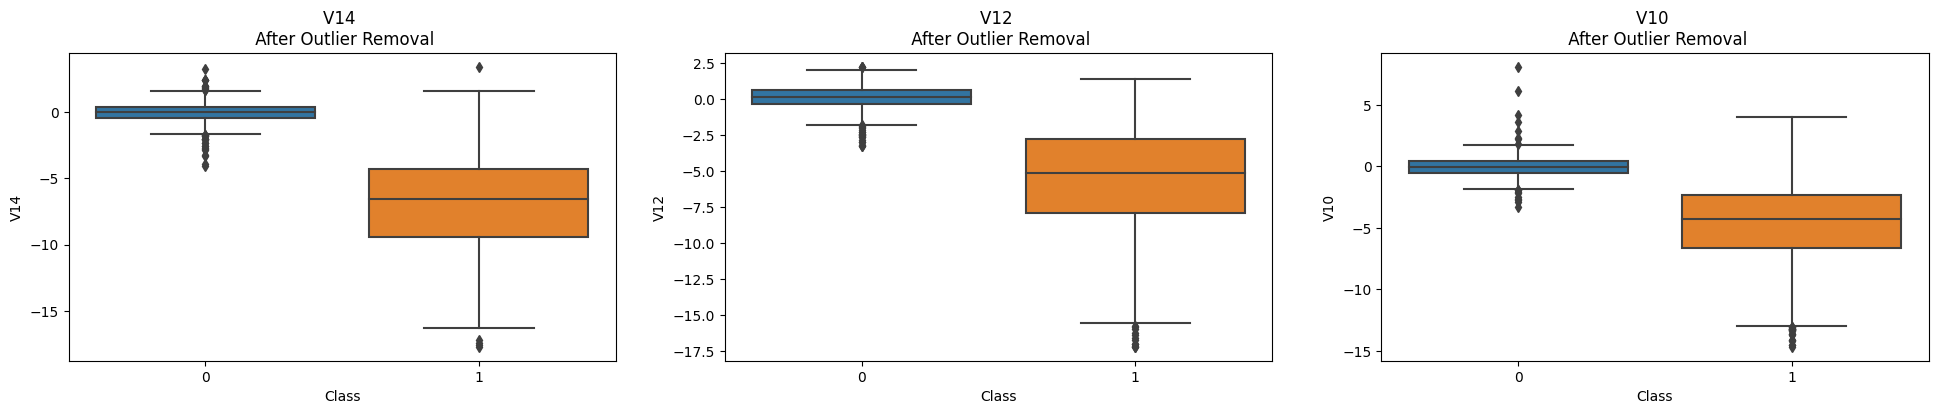

In [69]:
f, ax = plt.subplots(1, 3, figsize = (24, 4))
sns.boxplot(x = 'Class', y='V14', data=df_sample, ax = ax[0])
ax[0].set_title('V14 \n After Outlier Removal')
sns.boxplot(x = 'Class', y='V12', data=df_sample, ax = ax[1])
ax[1].set_title('V12 \n After Outlier Removal')
sns.boxplot(x = 'Class', y = 'V10', data=df_sample, ax = ax[2])
ax[2].set_title('V10 \n After Outlier Removal')
plt.show()

**Visualization through boxplot confirms that the number of "extreme outliers" have been reduced to a considerable amount.**

#### **Dimensionality Reduction and Clustering:**

**SVD and PCA**

In [70]:
df_sample.shape

(949, 31)

In [71]:
X_sample = df_sample.drop('Class', axis=1)
y_sample = df_sample.Class

In [72]:
X_sample.values

array([[-0.50401203, -0.50401203, -7.22273131, ..., -0.26684547,
         1.19369458,  0.25746846],
       [-0.47344306, -0.47344306, -4.61746103, ..., -0.23999624,
        -0.18346305, -0.0733597 ],
       [ 0.64703533,  0.64703533,  0.46799194, ...,  0.17063643,
         0.85179831,  0.37209828],
       ...,
       [ 0.87167377,  0.87167377,  2.07104295, ...,  0.26029116,
        -0.07967419, -0.07960301],
       [ 0.37749504,  0.37749504,  1.3242813 , ...,  0.45007697,
        -0.04551376,  0.06162686],
       [-0.57484228, -0.57484228, -4.50780782, ..., -0.02738041,
         0.16565536, -0.82242243]])

In [73]:
from sklearn.decomposition import PCA

In [74]:
PCA()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_sample)

In [76]:
X_reduced_pca

array([[16.31110241,  3.34973381],
       [11.73599379, -3.00172139],
       [ 5.82507209, -4.27545433],
       ...,
       [-8.25709517,  1.07572914],
       [-7.92699661,  0.97954209],
       [-7.115901  ,  2.81149992]])

In [77]:
X_reduced_pca.shape

(949, 2)

In [78]:
X_ax = X_reduced_pca[:, 0]
Y_ax = X_reduced_pca[:, 1]

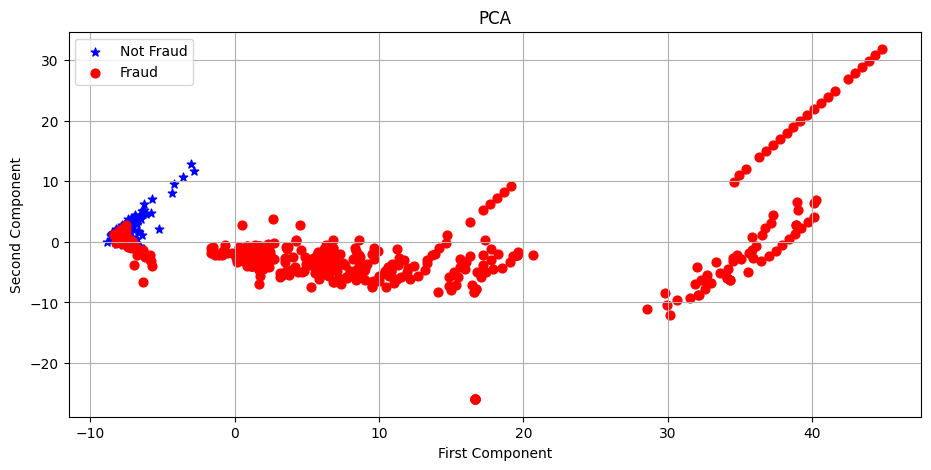

In [79]:
fig, ax =  plt.subplots(figsize = (11, 5))
ax.grid(True)
fig.patch.set_facecolor('white')
c_dict,  label_dict, marker, alpha = {0: 'blue', 1: 'red'}, {0:'Not Fraud', 1:'Fraud'}, {0:'*', 1: 'o'} , {0: 1, 1: 1}
for value in np.unique(y_sample):
  index = np.where(y_sample == value)
  ax.scatter(X_ax[index], Y_ax[index], c= c_dict[value], label = label_dict[value], s=40, marker = marker[value], alpha= alpha[value])

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PCA')
plt.legend()
plt.show()

In [80]:
from sklearn.decomposition import TruncatedSVD

In [81]:
TruncatedSVD()

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)

In [82]:
X_reduced_SVD = TruncatedSVD(n_components=2, random_state=42).fit_transform(X_sample)

In [83]:
X_reduced_SVD

array([[24.14500926,  3.11516261],
       [19.77418469, -3.14478545],
       [14.08491305, -5.15564097],
       ...,
       [-0.35629289, -0.32502596],
       [ 0.0435221 , -0.50824336],
       [ 0.7288804 ,  1.47256695]])

In [84]:
X_ax = X_reduced_SVD[:, 0]
Y_ax = X_reduced_SVD[:, 1]

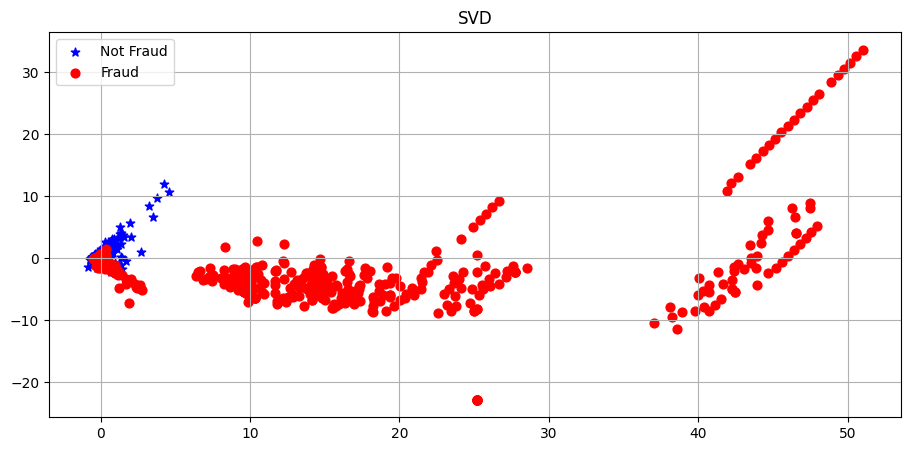

In [85]:
fig, ax =  plt.subplots(figsize = (11, 5))
ax.grid(True)
fig.patch.set_facecolor('white')
c_dict,  label_dict, marker, alpha = {0: 'blue', 1: 'red'}, {0:'Not Fraud', 1:'Fraud'}, {0:'*', 1: 'o'} , {0: 1, 1: 1}
for value in np.unique(y_sample):
  index = np.where(y_sample == value)
  ax.scatter(X_ax[index], Y_ax[index], c= c_dict[value], label = label_dict[value], s=40, marker = marker[value], alpha= alpha[value])

plt.title('SVD')
plt.legend()
plt.show()  

**Model Selection**

A Classification problem where we will try to classify Fraud and Non-Fraud Transactions. 

We will be using **Logistic Regressor, K-Nearest, SVM, Decision** trees classifier and we will be Selecting the model on performance matrix for each of these.

In [86]:
df_sample.shape

(949, 31)

In [87]:
from sklearn.model_selection import train_test_split

**Undersampling/ Upsampling before Cross Validation Leads  to Overfitting**

In [88]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(df_sample.drop('Class', axis=1), df_sample.Class, test_size= 0.3) 

In [89]:
X_train_sample.shape, X_test_sample.shape

((664, 30), (285, 30))

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [91]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

**Let's Compare the Model's Training Accuracy:**

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# [classifier.__class__.__name__ for classifier in classifiers.values()]
print('Accuracy on Training Set for Different Models:\n')

for classifier in classifiers.values():
  classifier.fit(X_train_sample, y_train_sample)
  accuracy_score_training = cross_val_score(classifier, X_train_sample, y_train_sample, cv=5)
  print(f'Accuracy Score for {classifier.__class__.__name__} : {round(accuracy_score_training.mean() * 100, 3)} %')


Accuracy on Training Set for Different Models:

Accuracy Score for LogisticRegression : 92.471 %
Accuracy Score for KNeighborsClassifier : 92.773 %
Accuracy Score for SVC : 92.474 %
Accuracy Score for DecisionTreeClassifier : 86.441 %


**Let's Hyper Tune Our Models and find out the Best Estimators**

In [94]:
from sklearn.model_selection import GridSearchCV

#### A. Logistic Regression

In [95]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression  params:

penalty : {'l1', 'l2', 'elasticnet', 'none'} : Used to specify the norm used in the penalization. 

C : {float, default=1.0} Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger
regularization.

Regularization is actually a strategy used to build better-performing models by reducing the odds of overfitting, or when your model does such a good job of matching your training data that it performs badly on new data.

In [96]:
lg_params = {'penalty' : ['l1', 'l2'], 'C': [0.001,  0.01, 0.1, 1, 10, 100, 1000]}

In [97]:
grid_search_lg = GridSearchCV(LogisticRegression(), lg_params)

In [98]:
grid_search_lg

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
grid_search_lg.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
grid_search_lg.best_score_

0.9277284119389382

In [101]:
lg_best_estimator = grid_search_lg.best_estimator_
lg_best_estimator

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### B. **KNeighborsClassifier**

In [102]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier params:

n_neighbors : int, optional (default = 5) : Number of neighbors to use by 
default for kneighbors queries.

algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} : Algorithm used to compute the nearest neighbors.

leaf_size : int, optional (default = 30) Leaf size passed to BallTree or KDTree.  This can affect the speed of the construction and query, as well as the memory required to store the tree.  The optimal value depends on the
nature of the problem.

metric : string or callable, default 'minkowski' the distance metric to use for the tree.  The default metric is minkowski

weights : str or callable, optional (default = 'uniform') weight function used in prediction.  
Possible values:

* 'uniform' : uniform weights.  All points in each neighborhood
are weighted equally.

* 'distance' : weight points by the inverse of their distance.
in this case, closer neighbors of a query point will have a
greater influence than neighbors which are further away.

* [callable] : a user-defined function which accepts an
array of distances, and returns an array of the same shape
containing the weights.


In [103]:
kn_params = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors' : [3, 4, 5, 6]}

In [104]:
grid_search_kneighbors = GridSearchCV(KNeighborsClassifier(), kn_params)
grid_search_kneighbors

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
grid_search_kneighbors.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
kneighbors_best_estimator = grid_search_kneighbors.best_estimator_
kneighbors_best_estimator

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [107]:
grid_search_kneighbors.best_score_

0.930747322852586

#### **C. SVC**

In [108]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**SVC params**

**C** :  float, optional (default=1.0) Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

**kernel** : string, optional (default='rbf') 

Specifies the kernel type to be used in the algorithm.
It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
a callable.

**degree** : int, optional (default=3) Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

**gamma** : {'scale', 'auto'} or float, optional (default='scale')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

* if 'auto', uses 1 / n_features.


In [109]:
svc_params = {'C': [0.5, 0.75, 0.9, 1], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

In [110]:
grid_search_svc = GridSearchCV(SVC(),  svc_params)
grid_search_svc

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 0.75, 0.9, 1],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
grid_search_svc.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 0.75, 0.9, 1],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
svc_best_estimator = grid_search_svc.best_estimator_
svc_best_estimator

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
grid_search_svc.best_score_

0.9247436773752564

D. **Decision trees**

In [114]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**criterion** : {"gini", "entropy"}, default="gini" 

The function to measure the quality of a split. Supported criteria are
"gini" for the Gini impurity and "entropy" for the information gain.

**max_depth** : int, default=None 

The maximum depth of the tree. If None, then nodes are expanded until
all leaves are pure or until all leaves contain less than
min_samples_split samples.

min_samples_leaf : int or float, default=1

The minimum number of samples required to be at a leaf node.
A split point at any depth will only be considered if it leaves at
least min_samples_leaf training samples in each of the left and
right branches.  This may have the effect of smoothing the model,
especially in regression.




In [115]:
decision_params = {'criterion': ['gini', 'entropy'], 'max_depth' : [3, 4, 5], 'min_samples_leaf' : [5, 6, 7]}

In [116]:
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), decision_params)
grid_search_tree

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [117]:
grid_search_tree.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [118]:
tree_best_estimator  = grid_search_tree.best_estimator_
tree_best_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
grid_search_tree.best_score_

0.905103668261563

**Cross Validation Score  -- Overfitting Case**

In [120]:
lg_score = cross_val_score(lg_best_estimator, X_train_sample, y_train_sample, cv=5)
print(f'Logistic Regression Cross Validation Score: {round(lg_score.mean() * 100, 3)}%')
kneighbors_score = cross_val_score(kneighbors_best_estimator, X_train_sample, y_train_sample, cv=5)
print(f'K-Neighbors Cross Validation Score: {round(kneighbors_score.mean() * 100, 3)}%')
svc_score = cross_val_score(svc_best_estimator, X_train_sample, y_train_sample, cv=5)
print(f'SVC Cross Validation Score: {round(svc_score.mean() * 100, 3)}%')
tree_score = cross_val_score(tree_best_estimator, X_train_sample, y_train_sample, cv=5)
print(f'Decision tree Validation Score: {round(tree_score.mean() * 100, 3)}%')

Logistic Regression Cross Validation Score: 92.773%
K-Neighbors Cross Validation Score: 93.075%
SVC Cross Validation Score: 92.474%
Decision tree Validation Score: 90.51%


####**Undersampling Using NearMiss**

In [121]:
from imblearn.under_sampling import NearMiss

In [122]:
X, y = df.drop('Class', axis=1), df.Class

In [123]:
for train_index, test_index in sss.split(X, y):
  print(f'Train Index: {train_index}, Test Index {test_index}')

Train Index: [169154 127533 155822 ...  13734  17629 208771], Test Index [121840 150900   8224 ...  83480 235146  15960]
Train Index: [ 80372 254422  49902 ...   2626  49777  81240], Test Index [ 58645 142938 201594 ...  44829 229358  83600]
Train Index: [ 51808 233373 240351 ... 192122 274884 249715], Test Index [  8118 270038 249575 ... 183355 186125   3130]
Train Index: [ 48391 141924 160920 ...  94642  34037 272662], Test Index [144512 256971  39438 ... 108278 149161 189258]
Train Index: [222079 275787 227837 ... 213506 163955 229342], Test Index [129285 234168  81930 ...   5589 113327   9346]


In [124]:
for train_index, test_index in sss.split(X, y):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  

**Undersampling During Cross Validation -- the Right Way**

In [125]:
from imblearn.pipeline import make_pipeline

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [127]:
model_accuracy,  model_precision, model_recall, model_f1, model_roc_auc = [], [], [], [], []

for train_index, test_index in sss.split(X_train, y_train):
  imba_pipeline = make_pipeline(NearMiss(sampling_strategy='majority'), lg_best_estimator)       # resample only the majority class
  model = imba_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  predictions = model.predict(X_train.iloc[test_index])                          

  model_accuracy.append(imba_pipeline.score(X_train_org.iloc[test_index], y_train_org.iloc[test_index]))

  model_precision.append(precision_score(y_train_org.iloc[test_index], predictions))

  model_recall.append(recall_score(y_train_org.iloc[test_index], predictions))                 
  model_f1.append(f1_score(y_train_org.iloc[test_index], predictions))
  model_roc_auc.append(roc_auc_score(y_train_org.iloc[test_index], predictions))

In [128]:
model

Pipeline(memory=None,
         steps=[('nearmiss',
                 NearMiss(n_jobs=1, n_neighbors=3, n_neighbors_ver3=3,
                          random_state=None, ratio=None, return_indices=False,
                          sampling_strategy='majority', version=1)),
                ('logisticregression',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [129]:
model_roc_auc

[0.811191509846205,
 0.7926901296366691,
 0.8242382202579944,
 0.8401994464951205,
 0.796246345198043]

In [130]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [131]:
lg_best_estimator_prediction = cross_val_predict(lg_best_estimator, X_train_sample, y_train_sample, cv=5, method='decision_function')

In [132]:
roc_auc_score(y_train_sample, cross_val_predict(lg_best_estimator, X_train_sample, y_train_sample, cv=5, method='decision_function'))

0.9711856100482811

In [133]:
# lg_best_estimator_prediction = lg_best_estimator.predict_proba(X_train_sample)
# roc_curve(y_train_sample, lg_best_estimator_prediction[:, 1])
# roc_auc_score(y_train_sample, lg_best_estimator_prediction[:, 1])
# false_pos_rate, true_pos_rate, thresh = roc_curve(y_train_sample, lg_best_estimator_prediction[:, 1])

In [134]:
false_pos_rate, true_pos_rate, thresh = roc_curve(y_train_sample, lg_best_estimator_prediction)

**ROC curve summarizes all of the Confusion Matrix that each threshold produced**

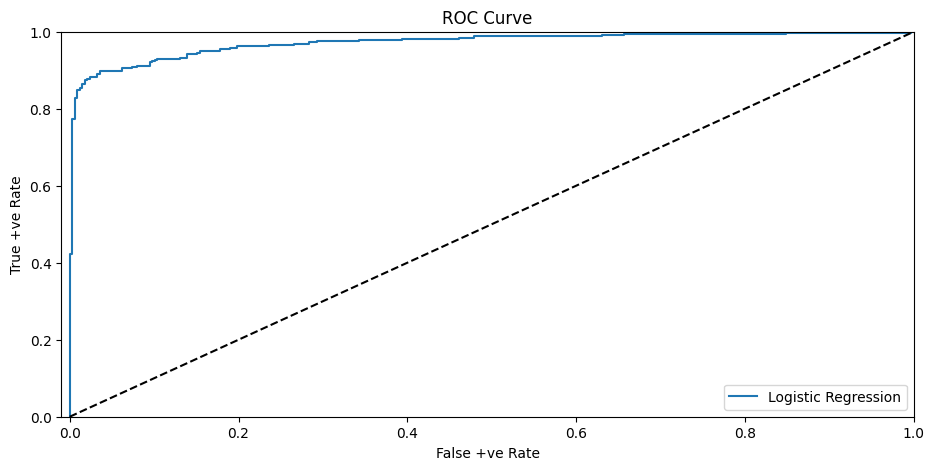

In [135]:
plt.figure(figsize = (11, 5))
plt.plot(false_pos_rate, true_pos_rate, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [136]:
lg_best_estimator_prediction = lg_best_estimator.predict(X_train_sample)
print('Overfitting Case:')
print(f'Recall Score: {recall_score(y_train_sample, lg_best_estimator_prediction)}')
print(f'precision Score:{precision_score(y_train_sample, lg_best_estimator_prediction)}')
print(f'F1 Score: {f1_score(y_train_sample, lg_best_estimator_prediction)}')


Overfitting Case:
Recall Score: 0.9263803680981595
precision Score:0.7089201877934272
F1 Score: 0.8031914893617021


#### **How it should be!**

In [137]:
print(f'Recall Score: {np.array(model_recall).mean()}')
print(f'F1 Score: {np.array(model_f1).mean()}')
print(f'precision Score: {np.array(model_precision).mean()}')

Recall Score: 0.9227272727272726
F1 Score: 0.01080137471803188
precision Score: 0.005433310622187825


In [138]:
lg_best_estimator.decision_function(X_test_org)

array([ 4.29955257, -4.04712221, -1.10968624, ...,  5.79511363,
       -1.4233649 ,  3.43355177])

In [139]:
from sklearn.metrics import average_precision_score

In [140]:
average_precision_score(y_test_org, lg_best_estimator.decision_function(X_test_org))

0.10612455882917737

### **Metrics of Models trained using Undersampling technique**

In [167]:
print('K-Nearest Neighbour: \n',classification_report(y_test_sample, grid_search_kneighbors.best_estimator_.predict(X_test_sample)))
print('SVC: \n',classification_report(y_test_sample, grid_search_svc.best_estimator_.predict(X_test_sample)))
print('Decision tree: \n',classification_report(y_test_sample, grid_search_tree.best_estimator_.predict(X_test_sample)))

K-Nearest Neighbour: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       154
           1       0.99      0.89      0.94       131

    accuracy                           0.94       285
   macro avg       0.95      0.94      0.94       285
weighted avg       0.95      0.94      0.94       285

SVC: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       154
           1       0.98      0.88      0.93       131

    accuracy                           0.94       285
   macro avg       0.94      0.93      0.94       285
weighted avg       0.94      0.94      0.94       285

Decision tree: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       154
           1       0.99      0.83      0.90       131

    accuracy                           0.92       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.93    

---

#### **SMOTE Oversampling**
SMOTE stands for Synthetic Minority Oversampling Technique, is an oversampling technique that creates synthetic minority class data points to balance the dataset.

* SMOTE works using a k-nearest neighbor algorithm to create synthetic data points. The steps of SMOTE algorithm is:

* Identify the minority class vector.
* Decide the number of nearest numbers (k), to consider.
* Compute a line between the minority data points and any of its neighbors and place a synthetic point.
* Repeat step 3 for all minority data points and their k neighbors, till the data is balanced.

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [141]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [142]:
SMOTE()

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')

In [143]:
smos = SMOTE(random_state=42, n_jobs=-1)

In [144]:
lg_params

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

In [145]:
randomised_scv = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions=lg_params, n_jobs=-1)

In [146]:
model_accuracy, model_precision, model_f1, model_recall, model_roc_auc = [], [], [], [], []

In [147]:
X_train.shape

(256326, 30)

In [148]:
for train_index, test_index in sss.split(X_train, y_train):

  imba_pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), randomised_scv)
  model = imba_pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  model_best_estimator = randomised_scv.best_estimator_

  predictions = model_best_estimator.predict(X_train.iloc[test_index])

  
  model_accuracy.append(imba_pipeline.score(X_train.iloc[test_index], y_train.iloc[test_index]))
  model_precision.append(precision_score(y_train.iloc[test_index], predictions))
  model_recall.append(recall_score(y_train.iloc[test_index], predictions))                 
  model_f1.append(f1_score(y_train.iloc[test_index], predictions))
  model_roc_auc.append(roc_auc_score(y_train.iloc[test_index], predictions))


In [149]:
print(f'Recall Score: {np.array(model_recall).mean()}')
print(f'F1 Score: {np.array(model_f1).mean()}')
print(f'precision Score: {np.array(model_precision).mean()}')

Recall Score: 0.8909090909090909
F1 Score: 0.11239163932079328
precision Score: 0.05999489711273678


In [150]:
randomised_scv.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
model_best_estimator.predict(X_test_org)

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
from sklearn.metrics import classification_report

In [153]:
print(classification_report(y_test_org, model_best_estimator.predict(X_test_org), target_names=['No Fraud', 'Fraud']))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     28432
       Fraud       0.06      0.90      0.12        49

    accuracy                           0.98     28481
   macro avg       0.53      0.94      0.55     28481
weighted avg       1.00      0.98      0.99     28481



In [154]:
model_best_estimator.decision_function(X_test_org)              # Confidence scores for samples.

array([-3.0237633 , -3.26011707, -5.74044034, ..., -2.06567855,
       -4.53202814, -2.39412614])

**Average precision Score**

In [155]:
average_precision_score(y_test_org, model_best_estimator.decision_function(X_test_org))

0.6828470430481672

In [156]:
smos = SMOTE(ratio='minority', random_state=42)

In [157]:
X_train_smos, y_train_smos = smos.fit_sample(X_train_org, y_train_org)

In [158]:
X_train_smos.shape, y_train_smos.shape

((511766, 30), (511766,))

**We are using Logistic Regression for prediction on Our Test Data**

In [159]:
lg_smos = grid_search_lg.best_estimator_

In [160]:
lg_smos.fit(X_train_smos, y_train_smos)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
lg_smos.predict(X_test_org)

array([0, 0, 0, ..., 0, 0, 0])

### **Confusion Matrix**

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
confusion_matrix(y_test_org, lg_smos.predict(X_test_org))

array([[27739,   693],
       [    6,    43]])

In [164]:
cm_lg_smos = confusion_matrix(y_test_org, lg_smos.predict(X_test_org))

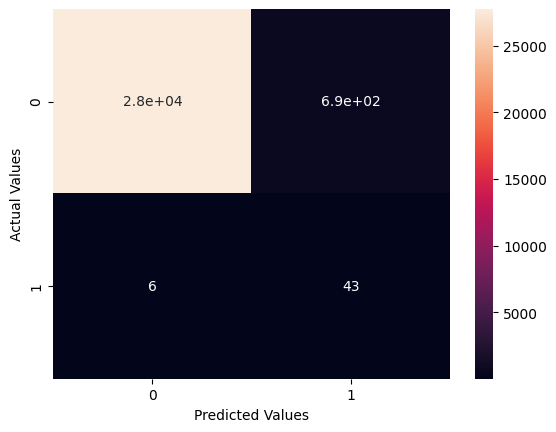

In [165]:
sns.heatmap(cm_lg_smos, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [166]:
print('Logistic Regression with SMOTE: \n',classification_report(y_test_org, lg_smos.predict(X_test_org)))

Logistic Regression with SMOTE: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.06      0.88      0.11        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.55     28481
weighted avg       1.00      0.98      0.99     28481



In [168]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy_score(y_test_org, lg_smos.predict(X_test_org))

0.9754573224254767